# Laboratorium 04
## Efekt Rungego
Iga Antonik, Helena Szczepanowska

# Zadanie 1

Wyznacz wielomiany interpolujące funkcje 
$$ f_1(x) = \frac{1}{1+25x^2} $$ 
na przedziale [−1, 1]
$$ f_2(x) = exp(cos(x)) $$ 
na przedziale [0, 2π]
używając:
- wielomianów Lagrange’a z równoodległymi węzłami $ x_j = x_0 + jh$  ,  $j =
0, 1, . . . , n,$ gdzie $h = \frac{x_n − x_0}{n} $
- kubicznych funkcji sklejanych z równoodległymi węzłami $x_j = x_0+jh$  ,  $j =
0, 1, . . . , n$, gdzie $h = \frac{x_n − x_0}{n} $
- wielomianów Lagrange’a z węzłami Czebyszewa
$$ x_j=cos(θ_j) $$ 
$$θ_j= \frac{2j+1}{2(n+1)}π,0≤j≤n. $$

(a) Dla funkcji Rungego, $f_1(x)$, z $n = 12$ węzłami interpolacji przedstaw na wspólnym wykresie funkcję $f_1(x)$ oraz wyznaczone wielomiany interpolacyjne i funkcję sklejaną. W celu stworzenia wykresu wykonaj próbkowanie funkcji $f_1(x)$ i wielomianów interpolacyjnych na 10 razy gęstszym zbiorze (próbkowanie jednostajne w x dla węzłów równoodległych, jednostajne w θ dla węzłów Czebyszewa). Pamiętaj o podpisaniu wykresu i osi oraz o legendzie.

(b) Wykonaj interpolację funkcji $f_1(x)$ i $f_2(x)$ z $n = 4, 5, ..., 50$ węzłami interpolacji, używając każdej z powyższych trzech metod interpolacji. Ewaluację funkcji, wielomianów interpolacyjnych oraz funkcji sklejanych przeprowadź na zbiorze 500 losowo wybranych punktów z dziedziny funkcji. Stwórz dwa rysunki, jeden dla f_1(x), drugi dla f_2(x). Na każdym rysunku przedstaw razem wykresy normy wektora błędów (czyli długości wektora) na tym zbiorze punktów w zależności od liczby węzłów interpolacji, n, dla każdej z trzech metod interpolacji.

Która metoda interpolacji jest najbardziej dokładna, a która najmniej?

Uwaga 1. Transformacja węzłów Czebyszewa $r ∈ [−1,1]$ na punkty $x ∈ [a,b]$ dana jest wzorem $x = a + (b − a) ∗ (r + 1)/2$.

Uwaga 2. Interpolację funkcjami sklejanymi można zaimplementować funkcją scipy.interpolate.interp1d. Zaimplementuj własnoręcznie interpolację Lagrange’a. Interpolacja Lagrange’a, w tym implementacja biblioteczna scipy.interpolate.lagrange jest niestablina numerycznie.

## Rozwiązanie

### Biblioteki

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, CubicSpline
import numpy.random as npr

### Definicje funkcji

In [13]:
def f1(x):
    return 1 / (1 + 25 * x**2)

def f2(x):
    return np.exp(np.cos(x))

### Interpolacja Lagrange'a 

In [14]:
def lagrange_interpolation(x_points, y_points, x):
    n = len(x_points)
    sum = 0
    for i in range(n):
        product = 1
        for j in range(n):
            if i != j:
                product *= (x - x_points[j]) / (x_points[i] - x_points[j])
        sum += y_points[i] * product
    return sum

### Węzły równoodległe i interpolacja Czebyszewa

In [15]:
def equidistant_nodes(a, b, n):
    return np.linspace(a, b, n)

def chebyshev_nodes(a, b, n):

    theta = np.pi * (2*np.arange(n) + 1) / (2*(n))
    x = np.cos(theta)
    x_transformed = a + (b - a) * (x + 1) / 2
    
    return x_transformed

## a)

In [16]:
n = 12
a, b = -1, 1
x_2 = np.linspace(a, b, 10*n)  # Gęstsza siatka dla wykresu
x_eq = equidistant_nodes(a, b, n)
x_cheb = chebyshev_nodes(a, b, n)

y_eq = f1(x_eq)
y_cheb = f1(x_cheb)

### Interpolacja

In [17]:
y_lagrange_eq = [lagrange_interpolation(x_eq, y_eq, x) for x in x_2]
y_lagrange_cheb = [lagrange_interpolation(x_cheb, y_cheb, x) for x in x_2]

### Kubiczne funkcje sklejane (dla węzłów równoodległych)

In [18]:
cubic_spline = interp1d(x_eq, y_eq, kind='cubic', fill_value="extrapolate")
y_cubic_spline = cubic_spline(x_2)

## Wykres

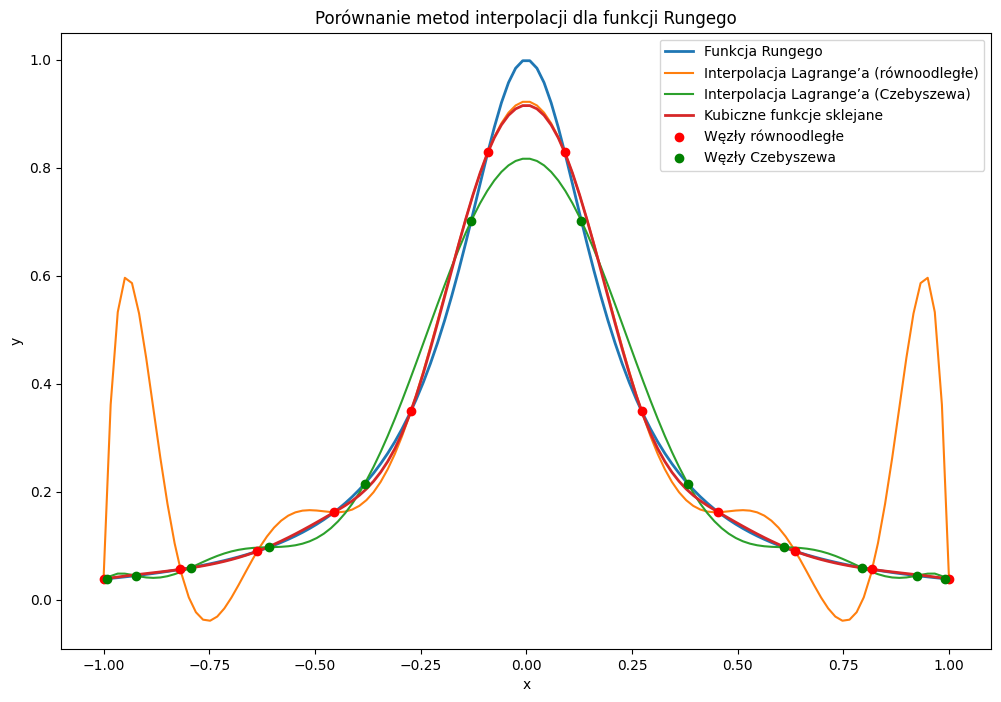

In [19]:
plt.figure(figsize=(12, 8))
plt.plot(x_2, f1(x_2), label='Funkcja Rungego', linewidth=2)
plt.plot(x_2, y_lagrange_eq, label='Interpolacja Lagrange’a (równoodległe)')
plt.plot(x_2, y_lagrange_cheb, label='Interpolacja Lagrange’a (Czebyszewa)')
plt.plot(x_2, y_cubic_spline, label='Kubiczne funkcje sklejane', linewidth=2)
plt.scatter(x_eq, y_eq, color='red', label='Węzły równoodległe', zorder=5)
plt.scatter(x_cheb, y_cheb, color='green', label='Węzły Czebyszewa', zorder=5)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Porównanie metod interpolacji dla funkcji Rungego')
plt.show()


Jak mozna zauwazyc na powyzszym wykresie dla równoodległych węzłów interpolacji wartości na końcach przedziału znacznie roznią się od oczekiwanych. Uzycie kubicznych funkcji sklejanych do wyznaczenia wielomianu interpolacyjnego sprawdziło się o wiele lepiej i otrzymany wielomian jest bardziej zblizony do oczekiwanego. Węzły Czebyszewa (równomiernie rozłożone, ale bardziej zagęszczone na krańcach przedziału) takze dają lepsze rezultaty przy tworzeniu wielomianu niz węzły równoodległe, jednak na samym krancu przedziału wartość znacznie odbiega od oczekiwanej.


## b)

In [20]:
n_values = range(4, 51)
x_random = npr.uniform(-1, 1, 500)  # Dla f1(x)
x_random_f2 = npr.uniform(0, 2 * np.pi, 500)  # Dla f2(x)

errors_f1 = {'Lagrange Equi': [],'Lagrange Cheb': [], 'Cubic Spline': []}
errors_f2 = {'Lagrange Equi': [], 'Lagrange Cheb': [], 'Cubic Spline': []}


### Obliczanie błędów dla n = 4,5,...,50 węzłów

In [21]:
for n in n_values:
    # Węzły równoodległe i Czebyszewa
    x_eq_f1 = np.linspace(-1, 1, n)
    x_cheb_f1 = chebyshev_nodes(-1, 1, n)
    x_eq_f2 = np.linspace(0, 2 * np.pi, n)
    x_cheb_f2 = chebyshev_nodes(0, 2 * np.pi, n)

    # Wartości funkcji
    y_eq_f1 = f1(x_eq_f1)
    y_cheb_f1 = f1(x_cheb_f1)
    y_eq_f2 = f2(x_eq_f2)
    y_cheb_f2 = f2(x_cheb_f2)

    # Interpolacje
    lagrange_eq_f1 = [lagrange_interpolation(x_eq_f1, y_eq_f1, x) for x in x_random]
    lagrange_cheb_f1 = [lagrange_interpolation(x_cheb_f1, y_cheb_f1, x) for x in x_random]
    cubic_spline_f1 = interp1d(x_eq_f1, y_eq_f1, kind='cubic', fill_value="extrapolate")
    y_cubic_spline_f1 = cubic_spline_f1(x_random)

    lagrange_eq_f2 = [lagrange_interpolation(x_eq_f2, y_eq_f2, x) for x in x_random_f2]
    lagrange_cheb_f2 = [lagrange_interpolation(x_cheb_f2, y_cheb_f2, x) for x in x_random_f2]
    cubic_spline_f2 = interp1d(x_eq_f2, y_eq_f2, kind='cubic', fill_value="extrapolate")
    y_cubic_spline_f2 = cubic_spline_f2(x_random_f2)

    # Błędy
    errors_f1['Lagrange Equi'].append(np.linalg.norm(f1(x_random) - lagrange_eq_f1))
    errors_f1['Lagrange Cheb'].append(np.linalg.norm(f1(x_random) - lagrange_cheb_f1))
    errors_f1['Cubic Spline'].append(np.linalg.norm(f1(x_random) - y_cubic_spline_f1))

    errors_f2['Lagrange Equi'].append(np.linalg.norm(f2(x_random_f2) - lagrange_eq_f2))
    errors_f2['Lagrange Cheb'].append(np.linalg.norm(f2(x_random_f2) - lagrange_cheb_f2))
    errors_f2['Cubic Spline'].append(np.linalg.norm(f2(x_random_f2) - y_cubic_spline_f2))

## Wykresy błędów

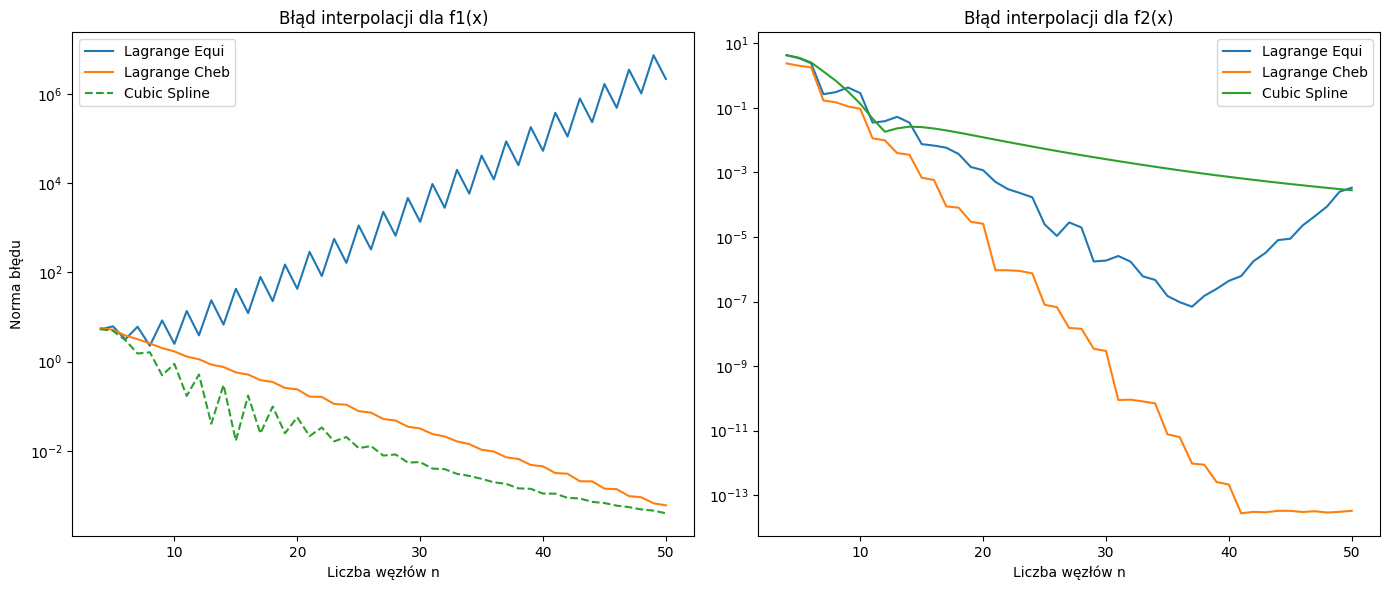

In [22]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for method, err in errors_f1.items():
    if method == 'Cubic Spline':
        plt.plot(list(n_values), err, label=method, linestyle='--')
    else: plt.plot(list(n_values), err, label=method)
plt.title('Błąd interpolacji dla f1(x)')
plt.xlabel('Liczba węzłów n')
plt.ylabel('Norma błędu')
plt.yscale("log")
plt.legend()

plt.subplot(1, 2, 2)
for method, err in errors_f2.items():
    plt.plot(list(n_values), err, label=method)
plt.title('Błąd interpolacji dla f2(x)')
plt.yscale("log")
plt.xlabel('Liczba węzłów n')
plt.legend()

plt.tight_layout()
plt.show()

Jak mozna zaobserwowac na powyzym wykresie zwiększenie ilości węzłów interpolacji dla $ f_1(x)$ negatywnie wpływa na dokładność wyniku uzyskanego przy pomocy wielomianu Lagrange z równoodległymi węzłami. Występuje tutaj efekt Rungego. Im więcej węzłów interpolacji tym bardziej wynik odbiega od oczekiwanego. Jednak interpolacja w węzłach Czebyszewa oraz interpolacja kubicznymi funkcjami sklejanymi dały duzo nizszą normę błędu interpolacji, ponieważ obie metody mają tendencję do dokładnego odwzorowania funkcji interpolowanej, zwłaszcza gdy liczba węzłów interpolacji jest odpowiednio duża.

Jednak dla funkcji $f_2(x)$ zachodzi odwrotne zjawisko, norma błędów interpolacji maleje wraz ze wzrostem liczby węzłów interpolacji, co sugeruje, że interpolacja staje się dokładniejsza. Interpolacja wielomianowa, może mieć trudności z dokładnym odwzorowaniem takiego szybkiego zmieniania się funkcji, szczególnie w przypadku małej liczby węzłów interpolacji.Więc, dodając więcej węzłów interpolacji, interpolowany wielomian ma więcej punktów odniesienia, co pozwala mu lepiej dopasować się do zmienności funkcji $f_2(x)$. Mozna jednak zaobserwowac, ze od pewnej ilosci węzłów błąd interpolacji wielomianowej dla równoodległych węzłów rośnie, moze byc to przejaw efektu Rungego. W tym przypadku najlepsze wyniki dała interpolacja Lagrange'a z węzłami czebyszewa.




## Wnioski

Efekt Rungego jest zjawiskiem polegającym na pogorszeniu jakości interpolacji wielomianowej przy zwiększaniu liczby węzłów interpolacji. W przypadku interpolacji wielomianowej, zwłaszcza w równoodległych węzłach, zjawisko to jest szczególnie widoczne.

Na powyszych wykresach obserwujemy wczesniej wspomniany efekt Rungego dla $ f_1(x) $. Jest on widoczny dla interpolacji wielomianami Lagrange’a z równoodległymi węzłami. Interpolacja wielomianami Lagrange’a z węzłami Czebyszewa jest bardziej odporna na efekt Rungego poniewaz przy krancach dziedziny ma bardziej zageszczone węzły interpolacji. Interpolacja kubicznymi funkcjami sklejanymi unika efektu Rungego przez co daje dokładniejsze wyniki.

Mozemy równiez wyciagnac wniosek, ze nie ma uniwersalnej metody interpolacji wielomianowej, która byłaby zbieżna dla wszystkich funkcji ciągłych, niezależnie od rozmieszczenia punktów interpolacji. Nawet jeśli wybierzemy punkty interpolacji w sposób optymalny, nadal istnieją funkcje, dla których wielomianowe interpolacje nie zbiegną do wartości funkcji. Widac to dobrze w podpunkcie b) gdzie dla róznych funkcji dokładność metod nie zachowuje się tak samo przy zwiększaniu ilości węzłów.

Podsumowując, interpolacja wielomianami Lagrange’a z równoodległymi węzłami jest najmniej dokładna, szczególnie dla funkcji $f_1(x)$ ze względu na efekt Rungego. Interpolacje kubicznymi funkcjami sklejanymi i wielomianami Lagrange’a z węzłami Czebyszewa wydają się być znacznie bardziej dokładne. Dobór odpowiednich węzłów interpolacji ma kluczowe znaczenie dla uzyskania dokładnych wyników.

## Bibliografia

prezentacja Runge phenomenon Marcin Kuta

http://heath.cs.illinois.edu/scicomp/notes/cs450_chapt07.pdf